<div class="alert alert-block alert-success">

<b> Exercise 2: <br> Measure the distance to a galaxy using the previously calibrated Cepheid Period-Luminosity relation </b>

</div>

Here we import packages:

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import astropy.units as u
from uncertainties import unumpy as unp
from uncertainties import ufloat

Type here the path where you placed the notebook and data files:

In [2]:
path_data = '/Users/louise/Desktop/2025-04-24_CosmoVerse_Lecture_Cepheids/Tutorials/'

Now, we read the data file with Cepheid information from Riess et al. (2022): <br> (https://ui.adsabs.harvard.edu/abs/2022ApJ...934L...7R/abstract) <br> <br>
Columns are: <br> - Galaxy name, <br> - RA and DEC, <br> - Cepheid, <br> - period, <br> - color (F555W-F814W) and uncertainty, <br> - F160W magnitude and uncertainty, <br> - metallicity (O/H), <br> - Additional note. 

In [5]:
R22 = pd.read_csv(path_data + 'Riess2022_tab2.dat', sep='\s+', header=0) 

We select only the galaxy we want to study (here N3447):

In [27]:
name_galaxy = 'N3447'
R22 = R22[R22['galaxy'] == name_galaxy]

<b> Note: </b> <br> In this exercise we measure the Cepheid Period-Luminosity relation in the same set of HST filters as in the previous exercise (F160W corrected from a color term): <br> 

<b> mHW = F160W - 0.386 * (F555W - F814W) </b> <br> 

We define a list of logP, apparent magnitudes "app_mag" with their errors for this Cepheid sample.

In [15]:
logP      = [np.log10(x) for x in R22['period']]
F160W, eF160W = list(R22['F160W']), list(R22['eF160W'])
color, ecolor = list(R22['color']), list(R22['e_color'])

app_mag   = [F160W[i] - 0.386*color[i] for i in range(len(R22))]
e_app_mag = [ np.sqrt(eF160W[i]**2 + (0.386*ecolor[i])**2) for i in range(len(R22))]

We now plot the apparent magnitudes versus logP to inspect the Period-Luminosity relation in N3447:

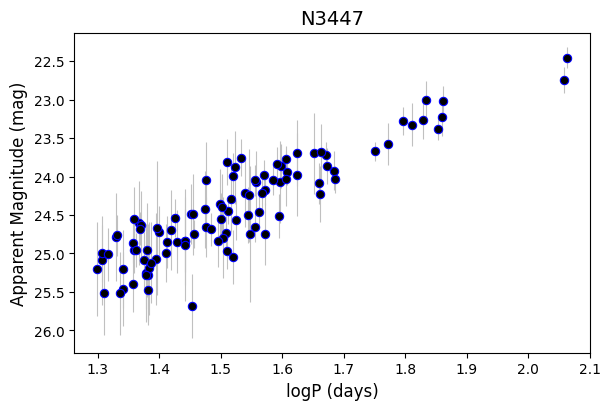

In [28]:
plt.figure(figsize=(6,4))
plt.subplots_adjust(left=0.10, right=0.96, top=0.92, bottom=0.12, hspace=0.1, wspace=0.3)

plt.errorbar(logP, app_mag, yerr=e_app_mag, fmt='o', color='blue', markerfacecolor='k', markeredgewidth=0.8, markersize=6, capsize=0, ecolor='silver', elinewidth=0.8)

plt.gca().invert_yaxis()
plt.xlabel('logP (days)', fontsize=12)
plt.ylabel('Apparent Magnitude (mag)', fontsize=12)
plt.title(name_galaxy, fontsize=14)
plt.show()

Set the slope to the same value obtained in exercise 1 in the Milky Way, and fit the intercept of the Period-Luminosity relation in this distant galaxy:

In [24]:
fixed_slope = -3.20

popt, pcov = curve_fit(lambda X, B: fixed_slope*X+B, logP, app_mag, sigma=e_app_mag)
intercept = popt[0]
e_intercept = np.sqrt(np.diag(pcov))[0]

print(f' -> M = {fixed_slope:.2f}*logP  + ({intercept:.2f} ± {e_intercept:.2f}) ')

 -> M = -3.20*logP  + (29.24 ± 0.03) 


Finally, we can measure the distance modulus ($\mu$) of this galaxy, compared to the Milky Way calibration: <br> 

In the Milky Way: <br> <br>
<b> M = slope * logP + intercept_MW </b> <br> <br>

In the N3447 galaxy: <br> <br>
<b> m = slope * logP + intercept_galaxy </b> <br> <br>

$\mu$ = m-M  <br>
$\mu$ = intercept_galaxy - intercept_MW